In [102]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
class RunnerResults:
    def __init__(self, line):
        fields = line.split(',')
        self.name = fields[0]
        self.cores = int(fields[1])
        self.min_threads = int(fields[2])
        self.max_threads = int(fields[3])
        self.n = int(fields[4])
        self.inserts = float(fields[5])
        self.removals = float(fields[6])
        self.lookups = float(fields[7])
        self.scaling_mode = fields[8]
        self.with_affinity = True if fields[9] == 'true' else False
        self.preload = float(fields[10])
        length = len(fields)
        self.run_times = []
        for t in fields[11:]:
            self.run_times.append(float(t))
 

def get_results(data_path):
    file_names = [fname for fname in os.listdir(data_path) if fname[0] != '.']
    results_list = []
    for fname in file_names:
        results = {}
        for line in open(os.path.join(data_path, fname), 'r').readlines():
            line = line.strip()
            if not len(line) or line.startswith(('#', 'list')):
                continue
            rr = RunnerResults(line)
            results[rr.name] = rr
        results_list.append(results)
    return results_list
                

In [104]:
base_list_name = 'DlList'
base_map_name = 'DlListMap'
list_names = ('CoarseGrainList', 'FineGrainList', 'NonBlockingList', 'LockFreeList')
map_names = (
    'CoarseGrainListMap', 'FineGrainListMap', 'NonBlockingListMap', 
    'LockFreeListMap', 'LibCuckooHashMap', 'TbbHashMap'
)
color_map = {
    'CoarseGrainList': 'b-', 'FineGrainList': 'g-', 'NonBlockingList': 'y-',
    'LockFreeList': 'm-', 'CoarseGrainListMap': 'b-', 'FineGrainListMap': 'g-',
    'NonBlockingListMap': 'y-', 'LockFreeListMap': 'm-', 'LibCuckooHashMap': 'c-',
    'TbbHashMap': 'r-'
}

default_fmt = '{}\nUse-profile: N={} inserts={}% removals={}% lookups={}%' 

def get_label_name(name):
    if name == 'NonBlockingList':
        return 'SpinningRwList'
    elif name == 'NonBlockingListMap':
        return 'SpinningRwListMap'
    else:
        return name

def create_file_name(rr, prefix, suffix):
    fmt = '{}_insert_{}_lookup_{}_removal_{}.{}'
    insert = int(rr.inserts*100)
    lookup = int(rr.lookups*100)
    removal = int(rr.removals*100)
    return fmt.format(prefix, insert, lookup, removal, suffix)

def get_speedup(results_dict, base_name, type_names):
    base_time = results_dict[base_name].run_times[0]
    speedup_info = []
    for type_name in type_names:
        speedup_times = [base_time/rt for rt in results_dict[type_name].run_times]
        speedup_info.append((type_name, speedup_times))
    return speedup_info

def do_plot(struct_name, speed_info, colors, n, insert, remove, lookup,
            range_first, range_last, create_file, file_name, fmt=default_fmt):
    thread_counts = range(range_first, range_last+1)
    plt.figure(figsize=(12,6))
    for name, s in speed_info:
        plt.plot(thread_counts, s, colors[name], label=get_label_name(name))
    plt.title(fmt.format(struct_name, n, insert*100, remove*100, lookup*100), fontsize=12)
    plt.ylabel('speedup', fontsize=12)
    plt.xlabel('threads', fontsize=12)
    plt.legend(loc='best')
    plt.axhline(y=1, color='k', linestyle='--')
    if create_file:
        plt.savefig(file_name, bbox_inches='tight')
    plt.show()

    
def do_plots(struct_name, results, base_name, type_names, colors,
            create_file=False, file_prefix='', file_format='png'):
    for result in results:
        speed_info = get_speedup(result, base_name, type_names)
        rr = result[base_name]
        file_name = ''
        if create_file:
            file_name = create_file_name(rr, file_prefix, file_format)
        do_plot(struct_name, speed_info, colors, rr.n, rr.inserts, rr.removals,
                rr.lookups, rr.min_threads, rr.max_threads, create_file, file_name)

In [105]:
# True  -> figures are saved to output files
# False -> don't generate figures
create_figures = False
fig_type = 'png'

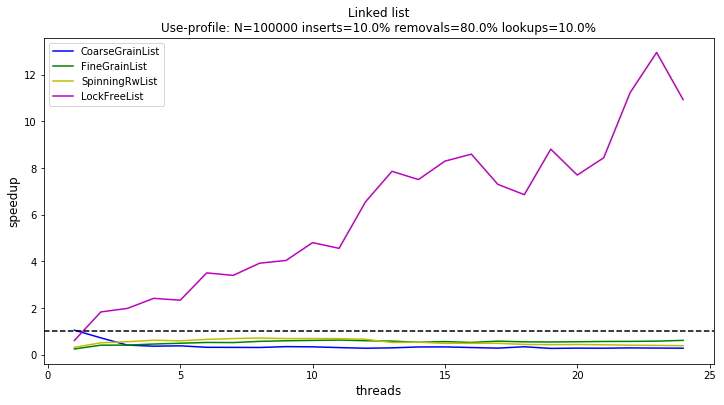

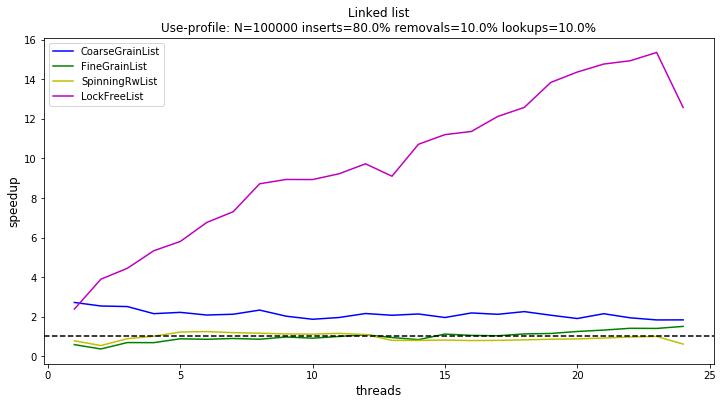

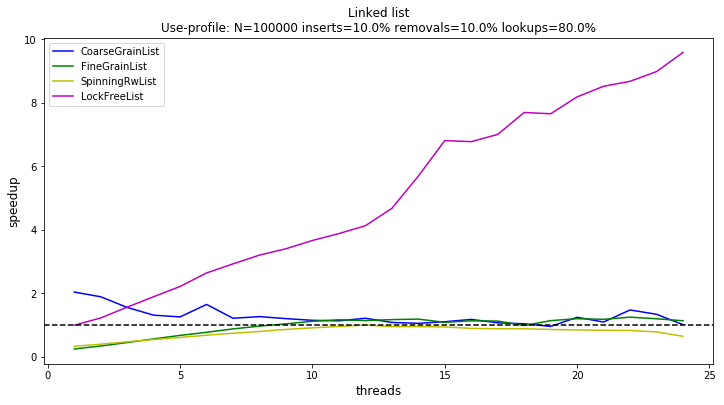

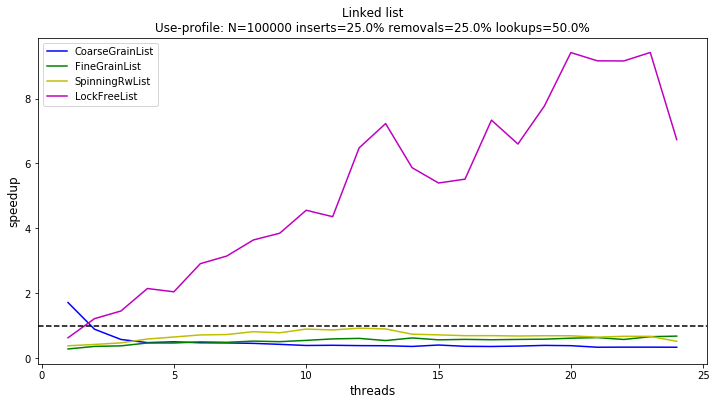

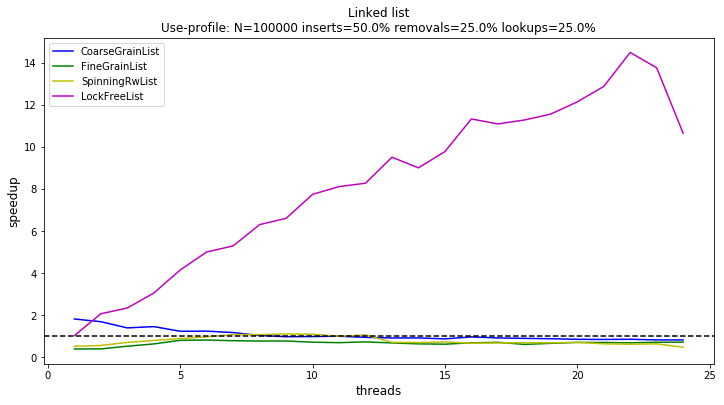

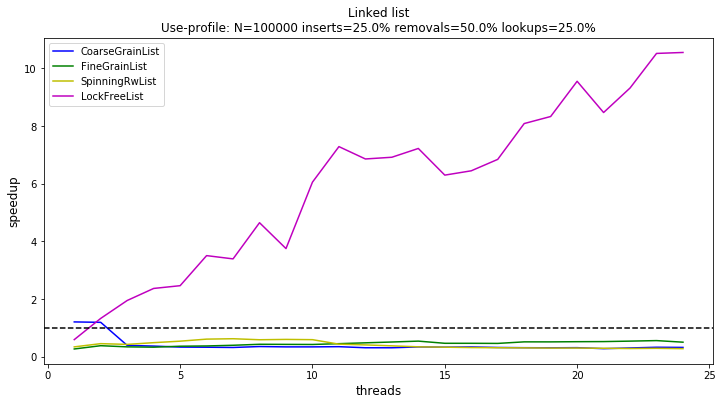

In [106]:
lateday_combined_data = '../../data/lateday/combined'
results_combined_data = get_results(lateday_combined_data)
do_plots('Linked list', results_combined_data, base_list_name, list_names,
         color_map, create_figures, 'lateday_combined_list', fig_type)

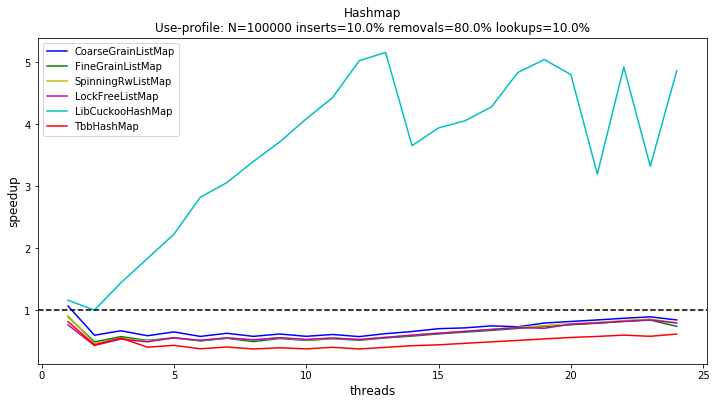

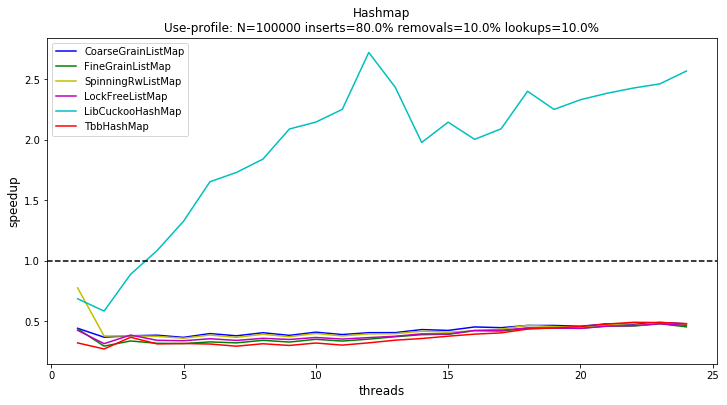

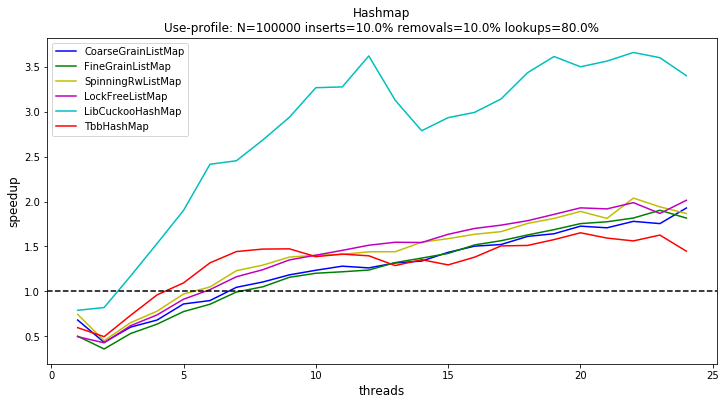

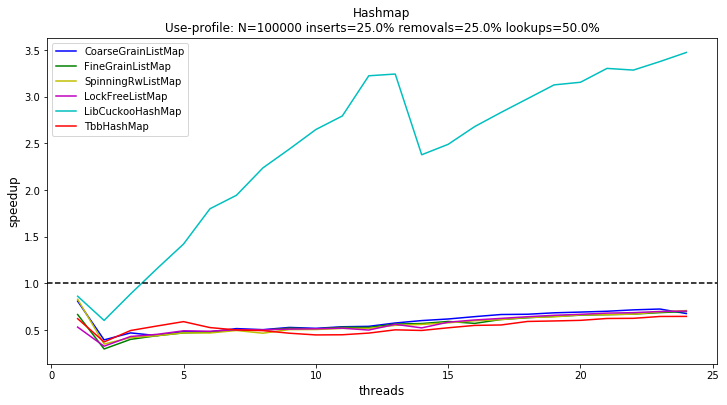

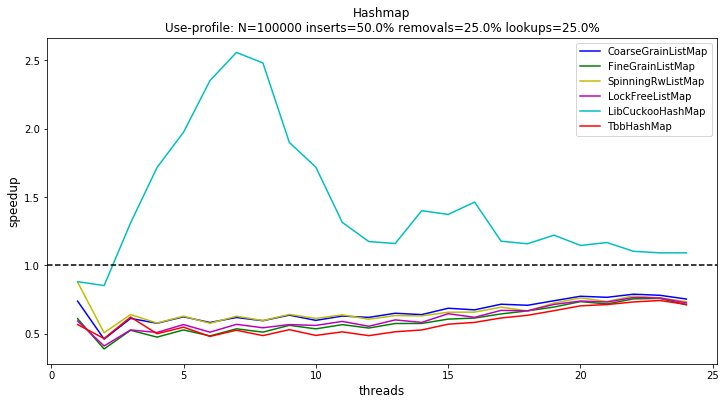

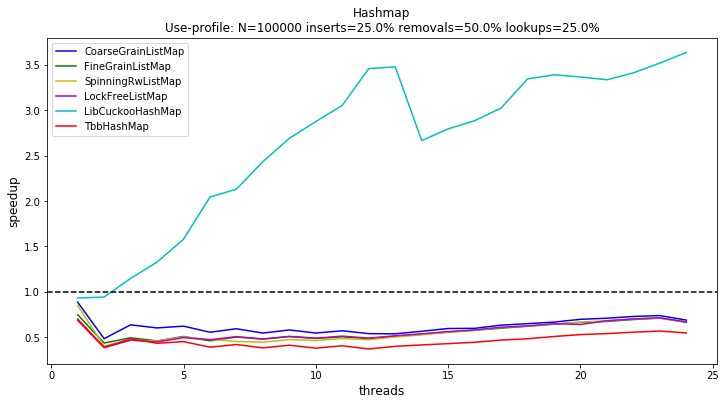

In [107]:
do_plots('Hashmap', results_combined_data, base_map_name, map_names,
         color_map, create_figures, 'lateday_combined_map', fig_type)

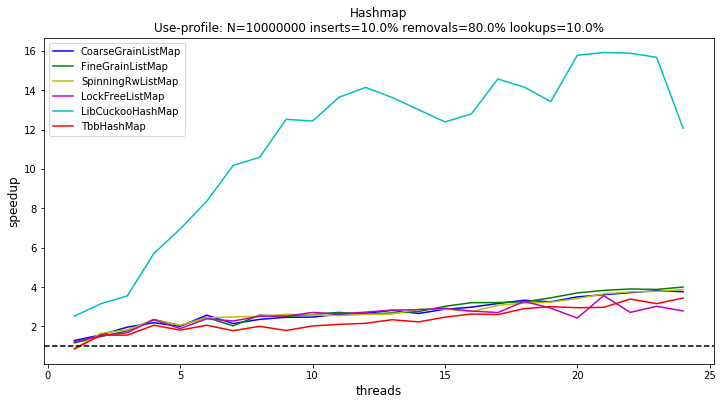

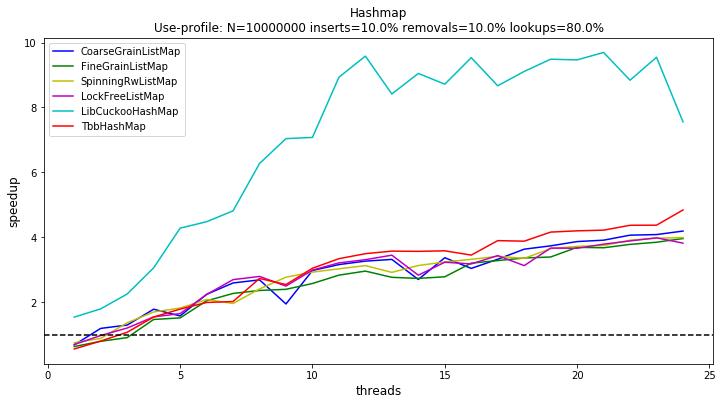

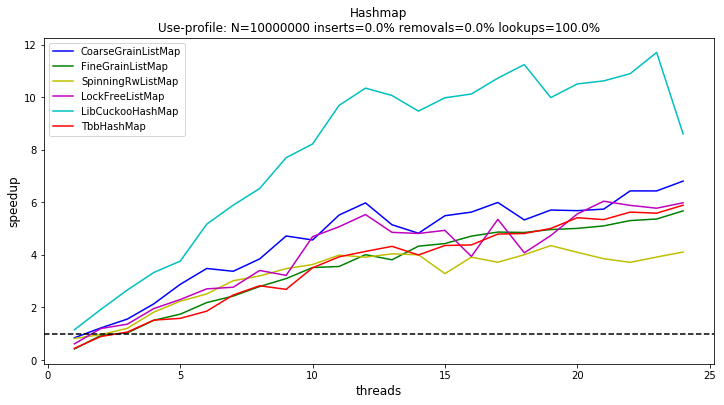

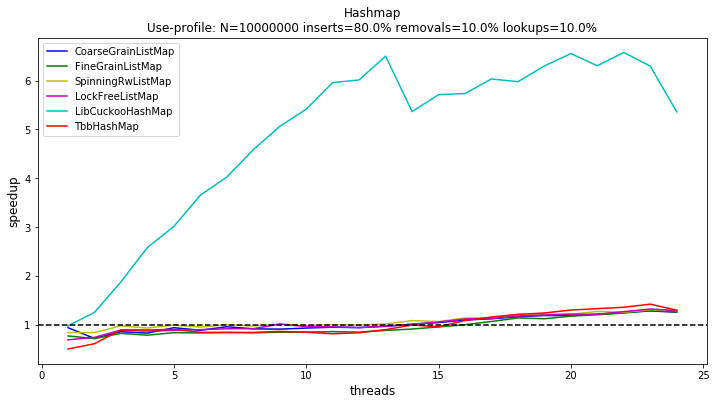

In [108]:
lateday_maponly_data = '../../data/lateday/maponly'
results_maponly = get_results(lateday_maponly_data)
do_plots('Hashmap', results_maponly, base_map_name, map_names,
         color_map, create_figures, 'lateday_maponly', fig_type)

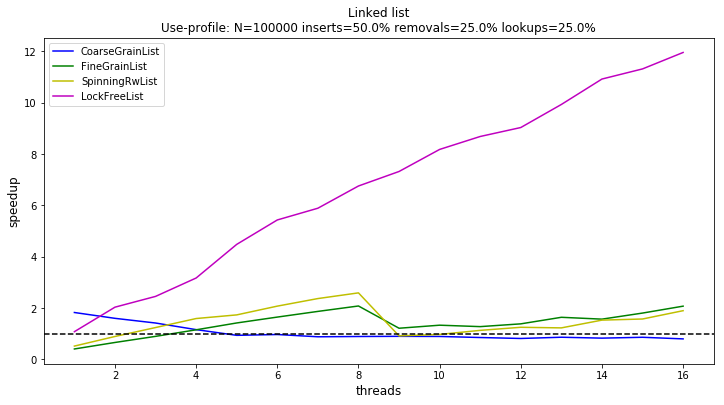

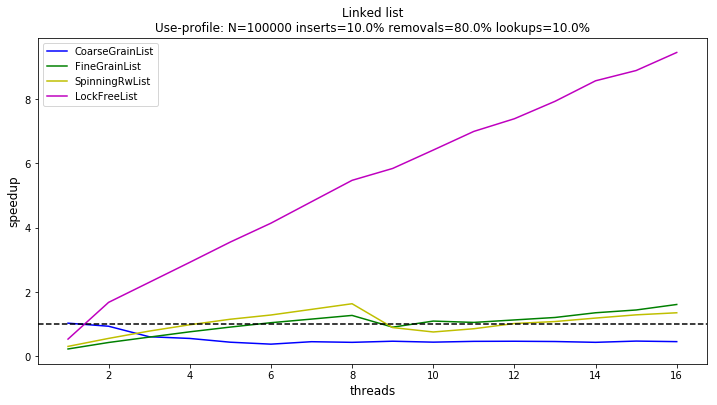

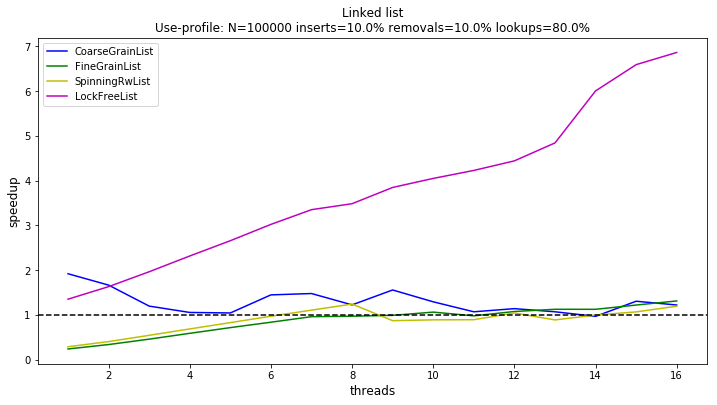

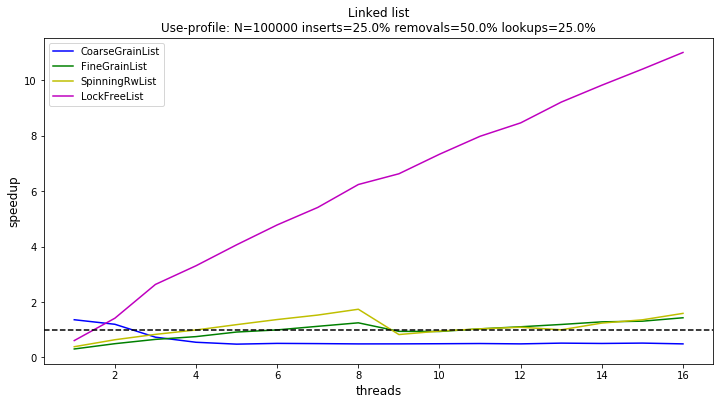

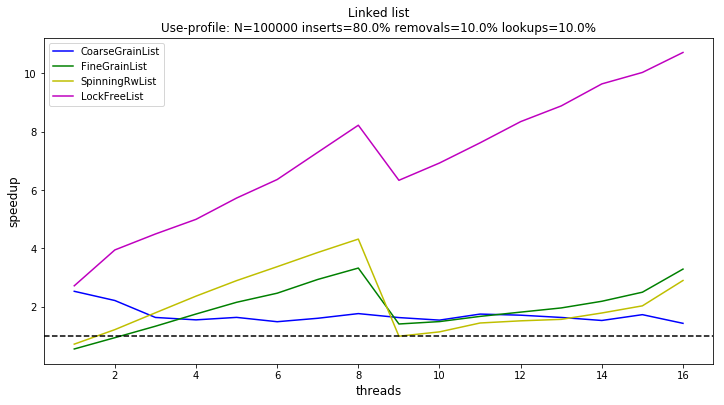

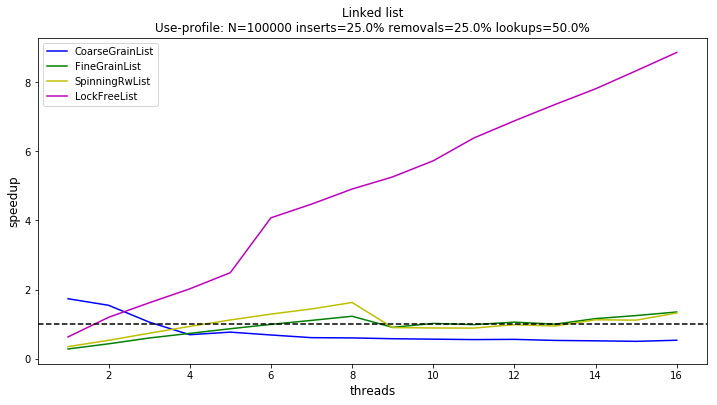

In [109]:
ghc_combined_data = '../../data/ghc/combined'
results_ghc_combined_data = get_results(ghc_combined_data)
do_plots('Linked list', results_ghc_combined_data, base_list_name, list_names,
         color_map, create_figures, 'ghc_combined_list', fig_type)

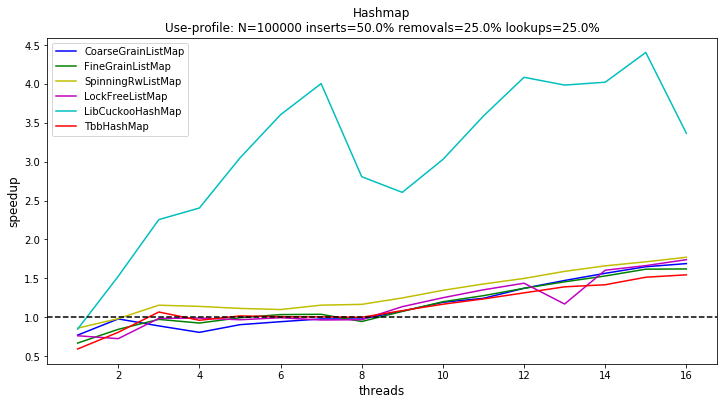

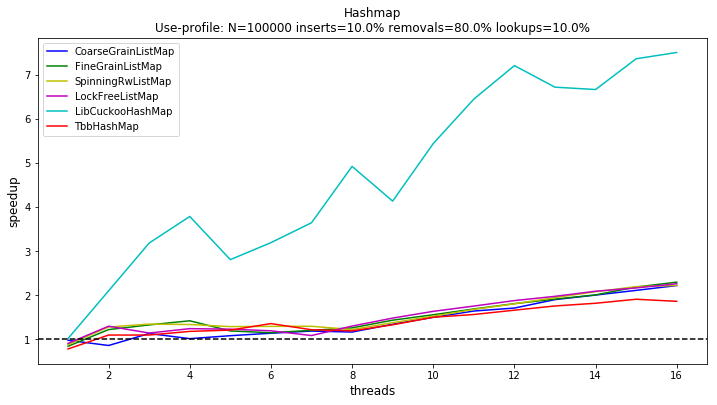

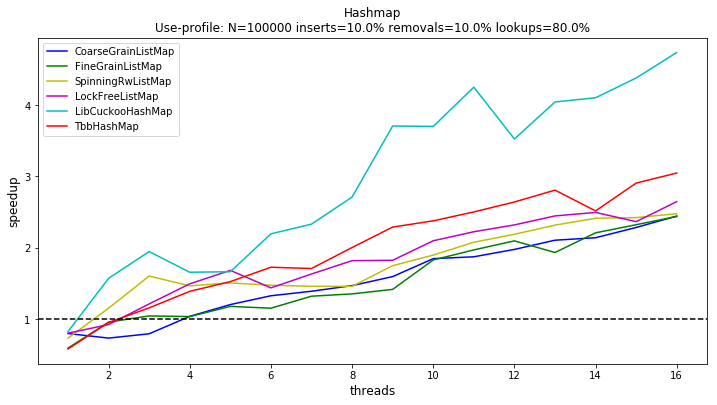

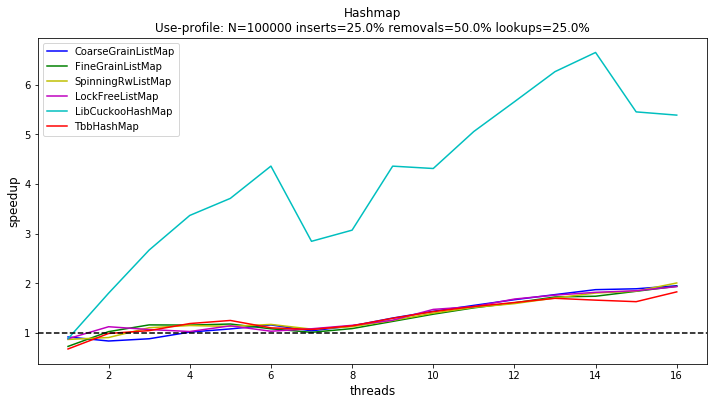

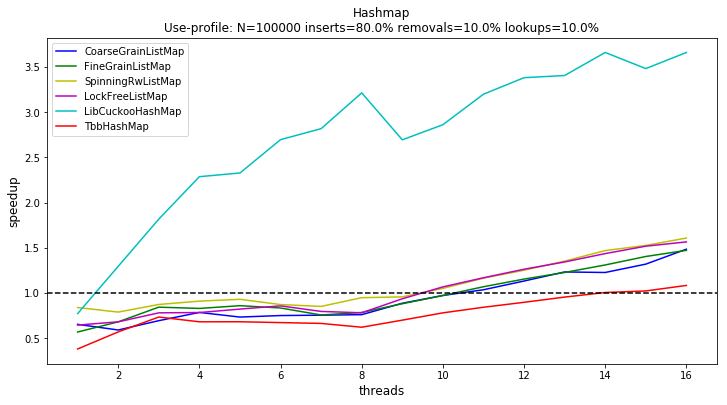

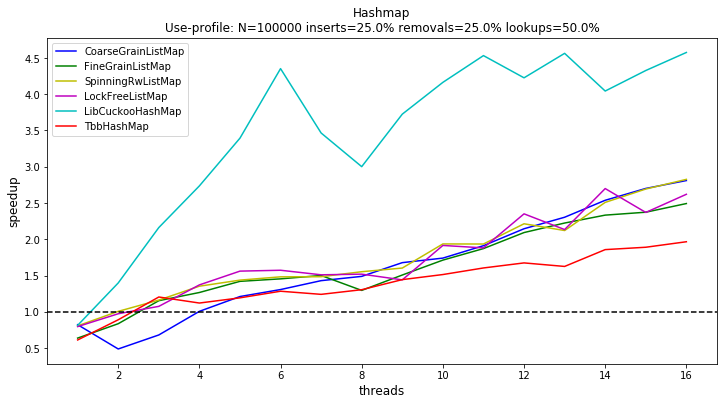

In [110]:
do_plots('Hashmap', results_ghc_combined_data, base_map_name, map_names,
         color_map, create_figures, 'ghc_combined_list', fig_type)

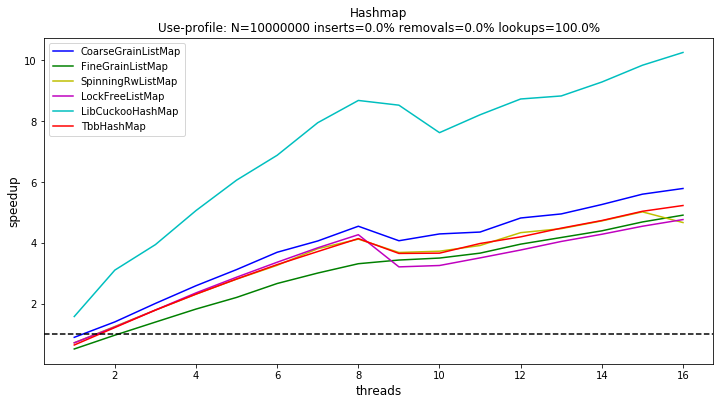

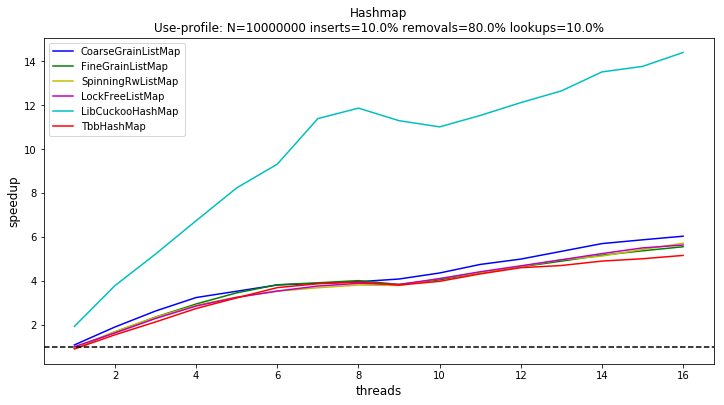

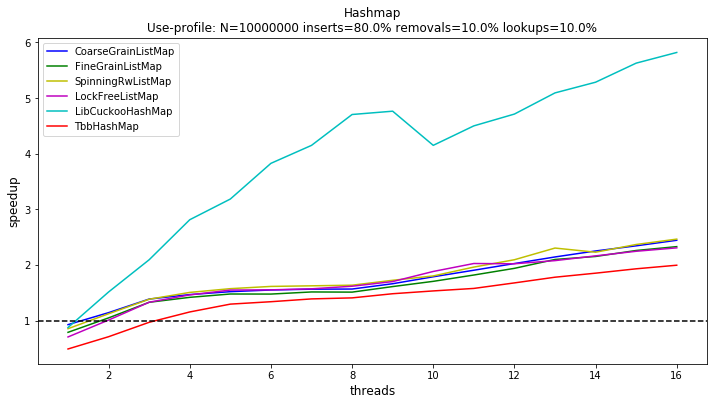

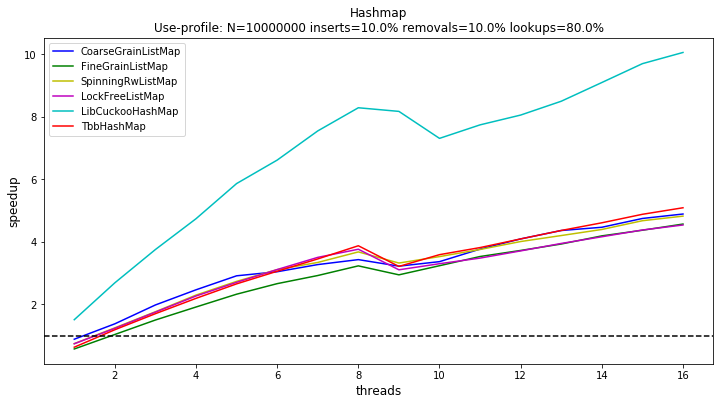

In [111]:
ghc_maponly_data = '../../data/ghc/maponly'
results_ghc_maponly_data = get_results(ghc_maponly_data)
do_plots('Hashmap', results_ghc_maponly_data, base_map_name, map_names,
         color_map, create_figures, 'ghc_maponly', fig_type)